### 二分类信息熵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

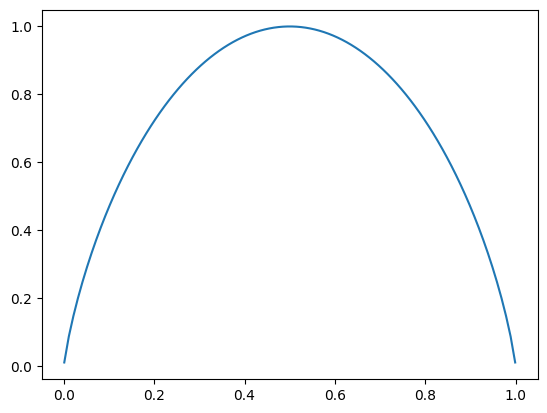

In [3]:
plot_x = np.linspace(0.001,0.999,100)
plt.plot(plot_x, entropy(plot_x))

熵可以用来表达确定度

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,1:3]
y = iris.target

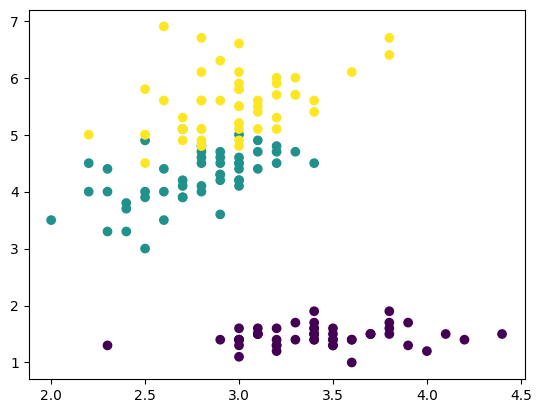

In [5]:
plt.scatter(x[:,0],x[:,1], c=y)

### 决策树

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')

In [8]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [9]:
def plot_decision_boundary(x, y, model):
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    print(x1.shape, x2.shape)
    z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF', '#BBFFBB', '#F9F9CB'])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()

(790, 440) (790, 440)


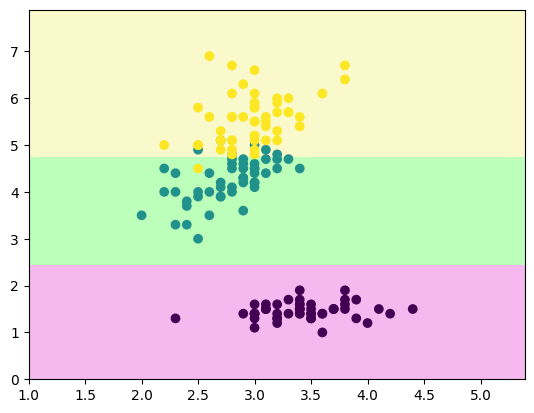

In [10]:
plot_decision_boundary(x, y, clf)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.154\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]')]

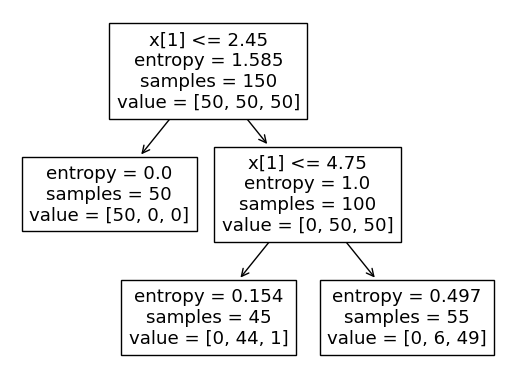

In [11]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [12]:
clf.score(x,y)

0.9533333333333334

### 寻找最优划分条件

In [13]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [14]:
def calc_entropy(y):
    counter = Counter(y)
    sum_ent = 0
    for i in counter:
        p = counter[i] / len(y)
        sum_ent += (-p * np.log2(p))
    return sum_ent

In [15]:
calc_entropy(y)

1.584962500721156

In [16]:
def split_dataset(x, y, dim, value):
    index_left = (x[:, dim] <= value)
    index_right = (x[:,dim] > value)
    return x[index_left], y[index_left], x[index_right], y[index_right]

In [17]:
x.shape

(150, 2)

In [18]:
def find_best_split(x, y):
    best_dim = -1
    best_value = -1
    best_entropy = np.inf
    best_entropy_left, best_entropy_right = -1, -1
    for dim in range(x.shape[1]):    # 特征x2
        sorted_index = np.argsort(x[:, dim])
        for i in range(x.shape[0] - 1):    # 特征x1
            value_left, value_right = x[sorted_index[i], dim], x[sorted_index[i+1], dim]
            if value_left != value_right: 
                value = (value_left + value_right) / 2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)
                entropy_left, entropy_right = calc_entropy(y_left), calc_entropy(y_right)
                entropy = (len(x_left) * entropy_left + len(x_right) * entropy_right) / x.shape[0]    # 加权平均值
                if entropy < best_entropy:
                    best_dim = dim
                    best_value = value
                    best_entropy = entropy
                    best_entropy_left, best_entropy_right = entropy_left, entropy_right
    return best_dim, best_value, best_entropy, best_entropy_left, best_entropy_right

In [19]:
find_best_split(x, y)

(1, 2.45, 0.6666666666666666, 0.0, 1.0)

在第一个维度进行分割, 以2.45为值分割成left, right, 分割后的best_entropy是0.666, best_entropy_left是0.0, best_entropy_right是1.0

In [20]:
x_left, y_left, x_right, y_right = split_dataset(x, y, 1, 2.45)

In [21]:
find_best_split(x_right, y_right)

(1, 4.75, 0.34262624992678425, 0.15374218032876188, 0.4971677614160753)